In [ ]:
import numpy as np
import cv2
import pandas as pd
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, Flatten, Reshape

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def get_image_array(path):
    image_list = os.listdir(path)
    images = []
    for img in image_list:
        img = cv2.imread(path+'/'+ img,3)
        images.append(img)
    return np.array(images)

In [ ]:
x_train = "/content/drive/MyDrive/NCFOML/noisetrain_x"
y_train = "/content/drive/MyDrive/NCFOML/noisetrain_y"
X_train = get_image_array(x_train)
Y_train = get_image_array(y_train)
# X_train = X_train.reshape((4,462*775))
X_train = X_train.astype('float32')/255 #this is one of the methods of standardizing ie there are 255 colours
# Y_train = Y_train.reshape((4,462*775))
Y_train = Y_train.astype('float32')/255

In [ ]:
noise, sr = librosa.load("/content/drive/MyDrive/NCFOML/CB/advpre.mp3")

In [ ]:
audio_signal = noise

In [ ]:
FFTLength = 51

seqLen = 10
Nodes = int((1 + FFTLength/2) * seqLen)*0.3
Nodes

79.5

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, Flatten, Reshape

FCmodel = Sequential()
FCmodel.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(462, 775, 3)))
FCmodel.add(MaxPooling2D(pool_size=(2, 2)))
FCmodel.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
FCmodel.add(MaxPooling2D(pool_size=(2, 2)))

FCmodel.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
FCmodel.add(MaxPooling2D(pool_size=(2, 2)))
FCmodel.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
FCmodel.add(MaxPooling2D(pool_size=(2, 2)))
FCmodel.add(Flatten())
FCmodel.add(Reshape((-1, FCmodel.output_shape[-1])))

FCmodel.add(LSTM(128, return_sequences=True))
FCmodel.add(LSTM(128, return_sequences=True))
FCmodel.add(LSTM(128))
FCmodel.add(Dense(256, activation='relu'))
FCmodel.add(Dense(128, activation='relu')) 
FCmodel.add(Dense(64, activation='relu'))  

FCmodel.add(Dense(462 * 775 * 3, activation='linear'))
FCmodel.add(Reshape((462, 775, 3)))  

In [ ]:
FCmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 460, 773, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 230, 386, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 228, 384, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 114, 192, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 190, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 56, 95, 128)       0

In [ ]:
FCmodel.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = FCmodel.fit(X_train,Y_train, epochs = 100)

Epoch 1/100
1/1 [==============================] - 18s 18s/step - loss: 0.7033 - accuracy: 0.3336
Epoch 2/100
1/1 [==============================] - 0s 158ms/step - loss: 0.7028 - accuracy: 0.9405
Epoch 3/100
1/1 [==============================] - 0s 171ms/step - loss: 0.7021 - accuracy: 0.9439
Epoch 4/100
1/1 [==============================] - 0s 163ms/step - loss: 0.7014 - accuracy: 0.9408
Epoch 5/100
1/1 [==============================] - 0s 161ms/step - loss: 0.7006 - accuracy: 0.9343
Epoch 6/100
1/1 [==============================] - 0s 162ms/step - loss: 0.6997 - accuracy: 0.9258
Epoch 7/100
1/1 [==============================] - 0s 162ms/step - loss: 0.6988 - accuracy: 0.9154
Epoch 8/100
1/1 [==============================] - 0s 167ms/step - loss: 0.6979 - accuracy: 0.9045
Epoch 9/100
1/1 [==============================] - 0s 154ms/step - loss: 0.6970 - accuracy: 0.8929
Epoch 10/100
1/1 [==============================] - 0s 162ms/step - loss: 0.6960 - accuracy: 0.8805
Epoch 11/1

In [ ]:
X_test = get_image_array("/content/drive/MyDrive/NCFOML/noisetest_x")
Y_test = get_image_array("/content/drive/MyDrive/NCFOML/noisetest_y")
X_test = X_test.astype('float32')/255
Y_test = Y_test.astype('float32')/255

In [ ]:
FCmodel.evaluate(X_test,Y_test)

1/1 [==============================] - 2s 2s/step - loss: 0.0126 - accuracy: 0.9734


[0.012603984214365482, 0.9733598828315735]

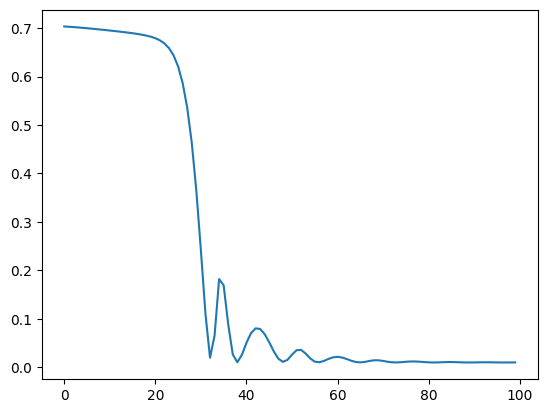

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])

In [ ]:
Xval = get_image_array("/content/drive/MyDrive/NCFOML/x_predict")
Yval = get_image_array("/content/drive/MyDrive/NCFOML/y_predict")
Xval = Xval.astype('float32')/255
Yval = Yval.astype('float32')/255

In [ ]:
import librosa
pred = FCmodel.predict(Xval)

1/1 [==============================] - 1s 1s/step


In [ ]:
# import librosa
# pred = FCmodel.predict(X_test)
# librosa.display.specshow()

In [ ]:
import matplotlib.pyplot as plt
#plt.show(pred[0])

In [ ]:
Y_test.shape

(2, 462, 775, 3)

In [ ]:
pred_s=np.sum(pred, axis=-1)
# pred_s[0].shape

In [ ]:
pred.shape

(1, 462, 775, 3)

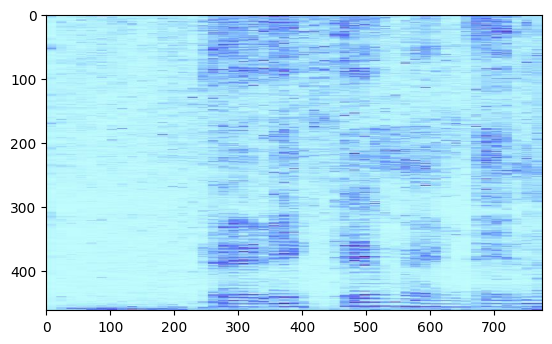

In [ ]:
plt.imshow(Yval[0])

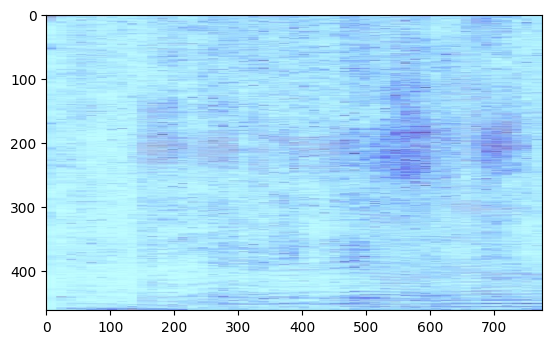

In [ ]:
plt.imshow(pred[0])

In [ ]:
# X_test.shape
# Y_test_s=np.sum(Y_test, axis=-1)

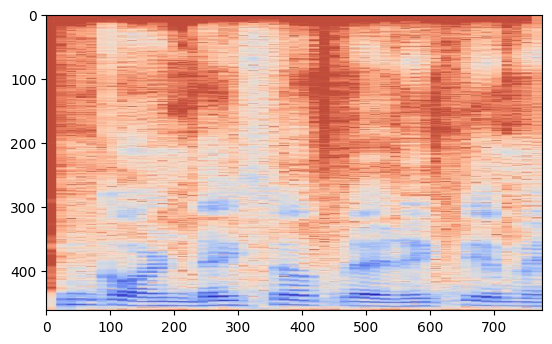

In [ ]:
plt.imshow(Xval[0])

In [ ]:
# X_test_s[0].shape

In [ ]:
# pred_s[0].shape

In [ ]:
Xval_s=np.sum(Xval, axis=-1)

In [ ]:
magnitude_spectrogram = librosa.db_to_amplitude(pred_s[0]/255.0)


In [ ]:
magnitude_spectrogram.shape

(462, 775)

In [ ]:
n_fft = 2048
hop_length = 512
audio_signal_mask = librosa.stft(magnitude_spectrogram, hop_length=hop_length, n_fft=n_fft)

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=775
  warnings.warn(


In [ ]:
magnitude_spectrogram_cb = librosa.db_to_amplitude(Xval_s[0]/255.0)

In [ ]:
n_fft = 2048
hop_length = 512
audio_signal_cb = librosa.stft(magnitude_spectrogram_cb, hop_length=hop_length, n_fft=n_fft)

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=775
  warnings.warn(


In [ ]:
starget = audio_signal_mask*audio_signal_cb

In [ ]:
audio_signal = librosa.istft(starget, hop_length=hop_length,win_length = 2048)

In [ ]:
audio_signal

array([[88.86977   , 88.09253   , 87.317085  , ...,  0.14102276,
         0.13100833,  0.12116137],
       [88.98783   , 88.209435  , 87.43283   , ...,  0.14129333,
         0.13126151,  0.12139663],
       [88.99906   , 88.22059   , 87.443886  , ...,  0.14128827,
         0.13125458,  0.12138835],
       ...,
       [89.060356  , 88.28146   , 87.50436   , ...,  0.14131907,
         0.13128445,  0.1214166 ],
       [89.05247   , 88.27363   , 87.49658   , ...,  0.14129135,
         0.131257  ,  0.1213901 ],
       [89.029854  , 88.25122   , 87.474365  , ...,  0.14127302,
         0.13124058,  0.12137584]], dtype=float32)

In [ ]:
audio_signal.shape

(462, 512)

In [ ]:
noise, sr = librosa.load('/content/drive/MyDrive/NCFOML/CB/cbnoiseadv.m4a')

<ipython-input-133-fe8b45e9de8a>:1: UserWarning: PySoundFile failed. Trying audioread instead.
  noise, sr = librosa.load('/content/drive/MyDrive/NCFOML/CB/cbnoiseadv.m4a')
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [ ]:
stft = librosa.stft(noise[:25000])
magnitude = np.abs(stft)
phase = np.angle(stft)
phase.shape

(1025, 49)

In [ ]:
phase

array([[ 3.1415927 ,  3.1415927 ,  3.1415927 , ...,  3.1415927 ,
         3.1415927 ,  0.        ],
       [-2.4931526 , -0.94487256,  0.5407286 , ..., -2.5616875 ,
        -0.2507359 ,  1.992449  ],
       [-1.8410453 ,  1.2539592 , -1.8703572 , ...,  1.0166299 ,
         2.2420633 , -1.7670729 ],
       ...,
       [-3.1354575 , -2.9401972 , -0.47444978, ...,  2.1596394 ,
        -0.5412181 ,  2.599949  ],
       [ 0.07722278, -2.332438  ,  0.5224946 , ..., -0.22119343,
        -0.27031374, -1.8416067 ],
       [ 3.1415927 ,  3.1415927 ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

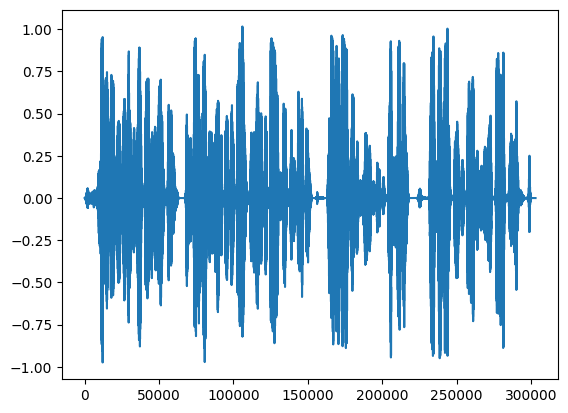

In [ ]:
plt.plot(audio_signal)

In [ ]:
import pydub
import soundfile as sf
sf.write('temp.wav', audio_signal,sr)
from pydub import AudioSegment
audio = AudioSegment.from_wav('temp.wav')
audio.export('output7.mp3', format='mp3')

<_io.BufferedRandom name='output7.mp3'>